#### Minh họa về Threshold và FPR (False Positive Rate)
https://machinelearningcoban.com/2017/08/31/evaluation/

In [36]:
import numpy as np
import sklearn.metrics as metrics
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
n0 = 20 # total negative label
n1 = 30 # total positive label

predicted_scores_0 = np.random.rand(n0)/2 # force values less than 0.5
labels_0 = np.zeros(n0, dtype=int)

predicted_scores_1 = np.random.rand(n1)/2 + 0.2 # in general, positive scores are larger than negative scores
labels_1 = np.ones(n1, dtype=int)

predicted_scores = np.concatenate([predicted_scores_0, predicted_scores_1])
labels = np.concatenate([labels_0, labels_1])

print(predicted_scores)
print(labels)

[0.31881051 0.3343628  0.29838347 0.4215987  0.21946216 0.08053496
 0.15971466 0.32310227 0.21239887 0.39849833 0.42131929 0.25440945
 0.04696871 0.45723596 0.13960317 0.40476042 0.03737876 0.46516783
 0.28661117 0.05172079 0.38849282 0.37946664 0.50542744 0.3257524
 0.47648813 0.43335167 0.62439243 0.46400435 0.62542106 0.69253223
 0.47703186 0.33225476 0.40403259 0.67121165 0.64861567 0.57907418
 0.61379234 0.31474915 0.23297561 0.40261961 0.43886988 0.46415099
 0.3607521  0.59862696 0.39247693 0.68129169 0.40083252 0.42871448
 0.41202764 0.4229123 ]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
# sklearn will suggest a list of thresholds and corresponding FPRs, TPRs 
fpr, tpr, thresholds = metrics.roc_curve(y_true=labels, y_score=predicted_scores, pos_label=1)
print(f'thresholds: {thresholds}')
print(f'FPR: {fpr}')
print(f'TPR: {tpr}')

thresholds: [1.69253223 0.69253223 0.47648813 0.46516783 0.46400435 0.45723596
 0.4229123  0.42131929 0.41202764 0.40476042 0.40083252 0.39849833
 0.3607521  0.3343628  0.3257524  0.31881051 0.31474915 0.25440945
 0.23297561 0.03737876]
FPR: [0.   0.   0.   0.05 0.05 0.1  0.1  0.2  0.2  0.25 0.25 0.3  0.3  0.35
 0.35 0.45 0.45 0.6  0.6  1.  ]
TPR: [0.         0.03333333 0.4        0.4        0.46666667 0.46666667
 0.6        0.6        0.63333333 0.63333333 0.73333333 0.73333333
 0.86666667 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667
 1.         1.        ]


In [39]:
# just format for readable
df = pd.DataFrame(data=[thresholds, fpr, tpr], index=['Threshold', 'FPR', 'TPR'])
df.T # transpose

,Threshold,FPR,TPR
0,1.692532,0.00,0.000000
1,0.692532,0.00,0.033333
2,0.476488,0.00,0.400000
3,0.465168,0.05,0.400000
4,0.464004,0.05,0.466667
5,0.457236,0.10,0.466667
6,0.422912,0.10,0.600000
7,0.421319,0.20,0.600000
8,0.412028,0.20,0.633333
9,0.404760,0.25,0.633333


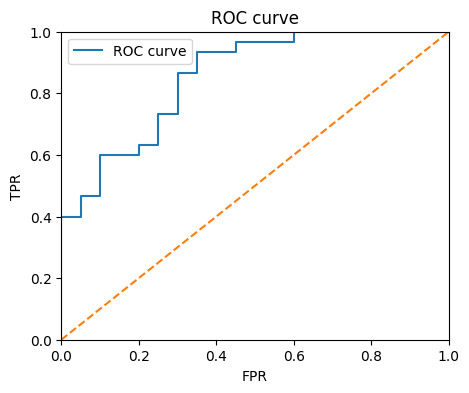

In [40]:
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.plot([0,1], [0,1], linestyle='--')

plt.xlim([0,1]) # limit x-axis
plt.ylim([0,1]) # limit y-axis

plt.title('ROC curve')
plt.legend()
plt.show()